In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


In [4]:
def geometric_series(a0, r, n):
    return sum([a0 * r**(i-1) for i in range(1, n)])

def geometric(a0, r, x):
    return a0 * r**x

def arithmetic(a0, d, x):
    return a0 + (d*x)

In [5]:
def plot(xs, ys):
    plt.plot(xs, ys)

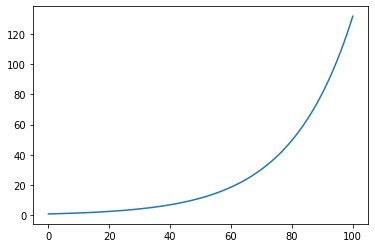

In [6]:
a0 = 1
r = 1.05

xs = np.linspace(0, 100, 100)
ys = np.vectorize(lambda x: geometric(a0, r, x))(xs)
plot(xs, ys)

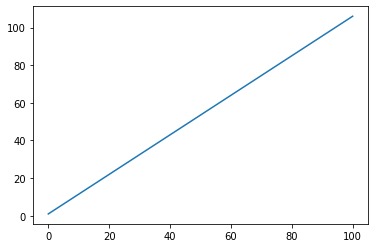

In [7]:
a0 = 1
d = 1.05

xs = np.linspace(0, 100, 100)
ys = np.vectorize(lambda x: arithmetic(a0, d, x))(xs)
plot(xs, ys)

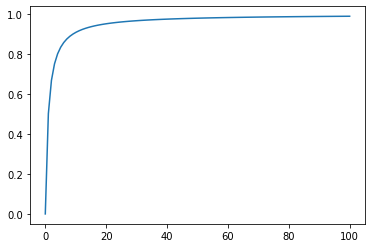

In [8]:
def f(x):
    return x / (x + 1)

xs = np.linspace(0, 100, 100)
ys = np.vectorize(f)(xs)
plot(xs, ys)

In [9]:
def zeta(s, n):
    return sum([1/(i**s) for i in range(1, (n+1))])

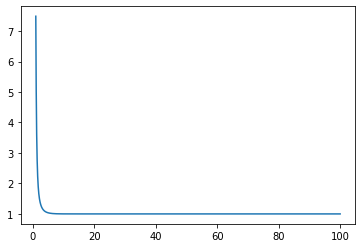

In [10]:
xs = np.linspace(1, 100, 10000)
ys = np.vectorize(lambda s: zeta(s, 1000))(xs)
plt.plot(xs, ys)


In [11]:
zeta(100, 3)

1.0

In [12]:
s = 100
n = 3
for i in range(1, (n + 1)):
    print(1/(i**s))

1.0
7.888609052210118e-31
1.9403252174826328e-48


In [13]:
1/100

0.01

In [14]:
1/2**100

7.888609052210118e-31

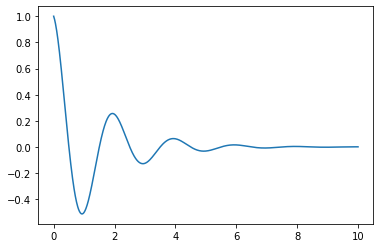

In [15]:
def r1(n):
    return ((-1)**n).real / 2**n # ((-1)**n) / 2**n
xs = np.linspace(0, 10, 1000)
ys = np.vectorize(r1)(xs)
plt.plot(xs, ys)

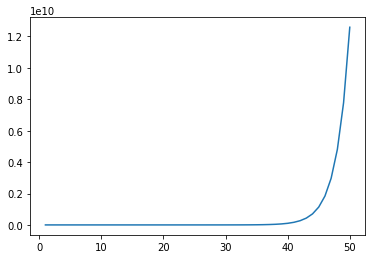

In [16]:
from functools import lru_cache

@lru_cache()
def fib(n):
    if n < 2:
        return n
    return fib(n-1) + fib(n-2)

n = 50
xs = np.linspace(1, n, n)
ys = np.vectorize(lambda x: fib(int(x)))(xs)
plt.plot(xs, ys)

In [17]:
def sigma(n, ak, ik=1):
    return sum([ak(k) for k in range(ik, (n+1))])

In [18]:
sigma(5, lambda k: k**2)

55

In [19]:
sigma(5, lambda k: 1/k, 3)

0.7833333333333332

In [20]:
sigma(10, lambda k: k, 5)

45

In [21]:
sigma(6, lambda k: 2)

12

In [22]:
def is_golden_ratio(shorter, longer):
    total = shorter + longer
    return (shorter / longer) == (longer / total)

In [23]:
(1 + math.sqrt(5)) / 2

1.618033988749895

In [24]:
def Gn(n):
    s5 = math.sqrt(5)
    a = (1 / s5)
    b = ((1 + s5)**n - (1 - s5)**n) / 2**n
    return a * b

In [25]:
xs = range(1, 50)
gs = np.vectorize(Gn)(xs)
fs = np.vectorize(fib)(xs)

In [26]:
gs = list(map(int, gs))
gs == fs

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

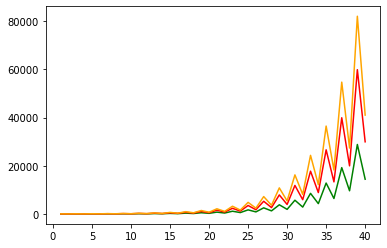

In [27]:
@lru_cache(maxsize=None)
def Sn(n, base):
    if n == 1:
        return base
    elif n % 2 == 0:
        return Sn(n - 1, base) / 2
    else:
        return 3 * Sn(n - 1, base) + 1
    
bases = [(11, 'green'), (25, 'red'), (35, 'orange')]
xs = range(1, 41)

for (base, color) in bases:
    ys = np.vectorize(lambda n: Sn(n, base))(xs)
    plt.plot(xs, ys, color=color)

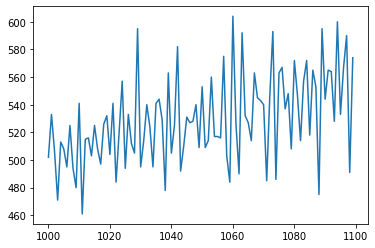

In [28]:
import sys
sys.setrecursionlimit(15000)

@lru_cache(maxsize=None)
def an(n):
    if n <= 2:
        return 1
    else:
        anm1 = an(n-1)
        anm2 = an(n-2)
        a = an(n - anm1)
        b = an(n - anm2)
        return a + b
xs = range(1000, 1100)
ys = [an(x) for x in xs]
plt.plot(xs, ys)

In [29]:
def t(a, d):
    o = 2 * a * d * (a / d + d / (2 * a) + 1)
    return math.sqrt(o)
(5 / t(5, 1), 3 / 5)

(0.6401843996644799, 0.6)

In [30]:
np.product([10**(i/10) for i in range(1, 20)])

1.0000000000000002e+19

In [31]:
10**19

10000000000000000000

In [32]:
1 - 3/5

0.4

In [33]:
3/5 - 3/7

0.17142857142857143

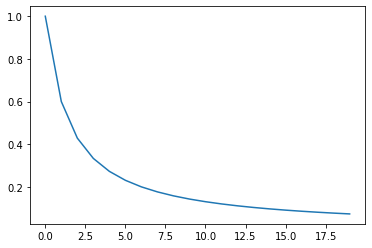

In [34]:
xs = range(20)
ys = [3 / (3 + 2 * x) for x in xs]
plt.plot(xs, ys)

In [35]:
8/3

2.6666666666666665

In [36]:
10 + 3 * 8/3

18.0

In [37]:
help(geometric_series)

geometric_series(1, 1.000001, 1000)

Help on function geometric_series in module __main__:

geometric_series(a0, r, n)



999.4986667097182

In [38]:
1 / (1 - 1.99)

-1.0101010101010102

In [39]:
def area(ps):
    triangle_side = float(ps)/2.0
    return 2 * (triangle_side**2)

In [40]:
initial = 1
areas = []
perimeters = []
for i in range(7):
    a = area(initial)
    areas.append(a)
    side = math.sqrt(a)
    perimeters.append(4 * side)
    initial = math.sqrt(a)
perimeters

[2.8284271247461903,
 2.0,
 1.4142135623730951,
 1.0,
 0.7071067811865476,
 0.5,
 0.3535533905932738]

(0.0, 1.0)

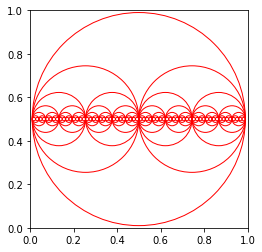

In [41]:
def circle(radius, origin):
    c = plt.Circle(origin, radius, color='r', fill=False)
    plt.gca().add_patch(c)

def recursive_circles(n, radius, origin):
    if n == 0:
        return
    circle(radius, origin)
    hradius = radius / 2
    left = origin[0] - hradius
    right = origin[0] + hradius
    recursive_circles(n-1, radius/2.0, (left, origin[1]))
    recursive_circles(n-1, radius/2.0, (right, origin[1]))

recursive_circles(7, 0.49, (0.5, 0.5))
plt.gca().set_aspect('equal')
plt.xlim([0,1])
plt.ylim([0,1])

In [58]:
n = 4

@lru_cache(maxsize=None)
def anp1(n):
    if n == 1: return 1
    return 1 / (1 + anp1(n-1))

[((fib(k) / fib(k+1)), anp1(k)) for k in range(1, 10)]

[(1.0, 1),
 (0.5, 0.5),
 (0.6666666666666666, 0.6666666666666666),
 (0.6, 0.6000000000000001),
 (0.625, 0.625),
 (0.6153846153846154, 0.6153846153846154),
 (0.6190476190476191, 0.6190476190476191),
 (0.6176470588235294, 0.6176470588235294),
 (0.6181818181818182, 0.6181818181818182)]

In [79]:
def is_prime(n):
    for k in range(2, n):
        if n % k == 0:
            return False
    return True

[(is_prime(n**2 - n + 11), n**2 - n + 11) for n in range(12)]

[(True, 11),
 (True, 11),
 (True, 13),
 (True, 17),
 (True, 23),
 (True, 31),
 (True, 41),
 (True, 53),
 (True, 67),
 (True, 83),
 (True, 101),
 (False, 121)]

In [115]:
r = range(2, 100000)
sum([(n**3 - 3*(n**2) + 2*n + 6) % 6 for n in r])

0

In [116]:
(24.0 + 9.0) / 6.0

5.5

In [117]:
4 + 9.0 / 6.0

5.5

In [185]:
from math import comb, factorial

n = 97
r = 13

f = factorial

last = comb(n + 1, r)
snd = comb(n, r) + comb(n, r-1)

def expanded():
    numer1 = (f(n-r+1)) / (f(n-r))
    numer2 = (f(r)) / (f(r-1))
    denomer = f(r) * f(n-r+1)
    print(numer1 + numer2)
    return int(f(n) * int(numer1 + numer2) / denomer)

expnd = expanded()
(expnd, snd, expnd == snd and snd == last)

print(n * f(r-1) + f(r-1), (n-r+1) * f(r-1) + f(r))

comb(100,2)

98.0
46942156800 46942156800


4950

In [183]:
0.01**2

0.0001

In [184]:
1.01**100

2.7048138294215285